# **Ordered Ordinal Encoding**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [2]:
# let's load the data set
data = pd.read_csv("credit_approval_uci_2.csv")
data.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15,target
0,b,30.83,0.000,u,g,w,v,1.25,t,t,1,f,g,202.0,0,1
1,a,58.67,4.460,u,g,q,h,3.04,t,t,6,f,g,43.0,560,1
2,a,24.50,0.500,u,g,q,h,1.50,t,f,0,f,g,280.0,824,1
3,b,27.83,1.540,u,g,w,v,3.75,t,t,5,t,g,100.0,3,1
4,b,20.17,5.625,u,g,w,v,1.71,t,f,0,f,s,120.0,0,1


In [3]:
# Let's separate into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=["target"], axis=1),  # predictors
    data["target"],  # target
    test_size=0.3,  # percentage of observations in test set
    random_state=0,  # seed to ensure reproducibility
)

X_train.shape, X_test.shape

((483, 15), (207, 15))

## **Ordered integer encoding with pandas**

In [4]:
# let's determine the target mean value per
# category of A7 and then sort them in ascending order
y_train.groupby(X_train["A7"]).mean().sort_values()

A7
o          0.000000
ff         0.146341
j          0.200000
dd         0.400000
v          0.418773
bb         0.512821
h          0.603960
n          0.666667
z          0.714286
Missing    1.000000
Name: target, dtype: float64

In [5]:
# let's we generate an ordered list with the labels of A7
ordered_labels = y_train.groupby(X_train["A7"]).mean().sort_values().index
ordered_labels

Index(['o', 'ff', 'j', 'dd', 'v', 'bb', 'h', 'n', 'z', 'Missing'], dtype='object', name='A7')

In [6]:
# let's create a dictionary with the mappings of categories to numbers
ordinal_mapping = {k: i for i, k in enumerate(ordered_labels, 0)}
ordinal_mapping

{'Missing': 9,
 'bb': 5,
 'dd': 3,
 'ff': 1,
 'h': 6,
 'j': 2,
 'n': 7,
 'o': 0,
 'v': 4,
 'z': 8}

In [7]:
# replace the labels with the ordered numbers
X_train["A7_enc"] = X_train["A7"].map(ordinal_mapping)
X_test["A7_enc"] = X_test["A7"].map(ordinal_mapping)

In [8]:
# let's inspect the original variable
X_train["A7"].head()

596     v
303     v
204     v
351    ff
118     v
Name: A7, dtype: object

In [9]:
# let's inspect the encoded variable
X_train["A7_enc"].head()

596    4
303    4
204    4
351    1
118    4
Name: A7_enc, dtype: int64

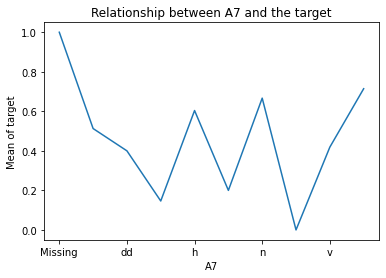

In [10]:
# let's plot the relationship between the target
# and the original variable
y_train.groupby(X_train["A7"]).mean().plot()
plt.title("Relationship between A7 and the target")
plt.ylabel("Mean of target")
plt.show()

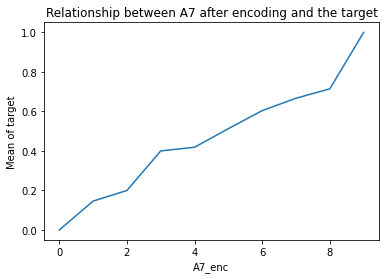

In [11]:
# let's explore the monotonic relationship between
# the target and the encoded variable
y_train.groupby(X_train["A7_enc"]).mean().plot()
plt.title("Relationship between A7 after encoding and the target")
plt.ylabel("Mean of target")
plt.show()

## **Ordered integer encoding with Feature-engine**

In [12]:
pip install feature-engine

     |████████████████████████████████| 260 kB 23.8 MB/s 
     |████████████████████████████████| 9.8 MB 63.7 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [13]:
from feature_engine.encoding import OrdinalEncoder

In [14]:
# Let's separate into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    data.drop(labels=["target"], axis=1),  # predictors
    data["target"],  # target
    test_size=0.3,  # percentage of observations in test set
    random_state=0,  # seed to ensure reproducibility
)

In [15]:
# let's set up the encoder to encode all categorical variables
ordinal_enc = OrdinalEncoder(encoding_method="ordered")

In [16]:
# when fitting the transformer, we need to pass the target as well
# just like with any Scikit-learn predictor class
ordinal_enc.fit(X_train, y_train)

OrdinalEncoder()

In [17]:
# the encoder stores the variables that it will encode
ordinal_enc.variables_

['A1', 'A4', 'A5', 'A6', 'A7', 'A9', 'A10', 'A12', 'A13']

In [18]:
# in the encoder_dict_ we find the numbers that will
# replace each category in each variable
ordinal_enc.encoder_dict_

{'A1': {'Missing': 2, 'a': 1, 'b': 0},
 'A10': {'f': 0, 't': 1},
 'A12': {'f': 1, 't': 0},
 'A13': {'g': 1, 'p': 2, 's': 0},
 'A4': {'Missing': 2, 'l': 3, 'u': 1, 'y': 0},
 'A5': {'Missing': 2, 'g': 1, 'gg': 3, 'p': 0},
 'A6': {'Missing': 13,
  'aa': 6,
  'c': 7,
  'cc': 11,
  'd': 1,
  'e': 9,
  'ff': 0,
  'i': 3,
  'j': 2,
  'k': 4,
  'm': 5,
  'q': 10,
  'r': 14,
  'w': 8,
  'x': 12},
 'A7': {'Missing': 9,
  'bb': 5,
  'dd': 3,
  'ff': 1,
  'h': 6,
  'j': 2,
  'n': 7,
  'o': 0,
  'v': 4,
  'z': 8},
 'A9': {'f': 0, 't': 1}}

In [19]:
# let's transform train and test sets
X_train_enc = ordinal_enc.transform(X_train)
X_test_enc = ordinal_enc.transform(X_test)

In [20]:
# Let's inspect the transformed data
X_train_enc.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
596,1,46.08,3.000,1,1,7,4,2.375,1,1,8,0,1,396.0,4159
303,1,15.92,2.875,1,1,10,4,0.085,0,0,0,1,1,120.0,0
204,0,36.33,2.125,0,0,8,4,0.085,1,1,1,1,1,50.0,1187
351,0,22.17,0.585,0,0,0,1,0.000,0,0,0,1,1,100.0,0
118,0,57.83,7.040,1,1,5,4,14.000,1,1,6,0,1,360.0,1332


In [21]:
# Let's inspect the transformed data
X_test_enc.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
14,1,45.83,10.50,1,1,10,4,5.000,1,1,7,0,1,0.0,0
586,0,64.08,20.00,1,1,12,6,17.500,1,1,9,0,1,0.0,1000
140,1,31.25,3.75,1,1,11,6,0.625,1,1,9,0,1,181.0,0
492,0,39.25,9.50,1,1,5,4,6.500,1,1,14,1,1,240.0,4607
350,1,26.17,2.00,1,1,2,2,0.000,0,0,0,0,1,276.0,1


## **Ordered integer encoding with Category Encoders**

In [22]:
pip install category_encoders

     |████████████████████████████████| 80 kB 8.7 MB/s 


In [23]:
from category_encoders.ordinal import OrdinalEncoder

In [24]:
# Let's encode the variable A7 since
# we have the mapping already
enc = OrdinalEncoder(mapping=[{"col": "A7", "mapping": ordinal_mapping}])

enc.fit(X_train)

# let's transform train and test sets
X_train_enc = enc.transform(X_train)
X_test_enc = enc.transform(X_test)

In [25]:
X_train_enc["A7"].head()

596    4
303    4
204    4
351    1
118    4
Name: A7, dtype: int64

In [26]:
X_train_enc.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,A15
596,a,46.08,3.000,u,g,c,4,2.375,t,t,8,t,g,396.0,4159
303,a,15.92,2.875,u,g,q,4,0.085,f,f,0,f,g,120.0,0
204,b,36.33,2.125,y,p,w,4,0.085,t,t,1,f,g,50.0,1187
351,b,22.17,0.585,y,p,ff,1,0.000,f,f,0,f,g,100.0,0
118,b,57.83,7.040,u,g,m,4,14.000,t,t,6,t,g,360.0,1332
